# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)
- [By Column]
    - []()
    - []()

## setup

### Import libraries

In [201]:
import pandas as pd
import numpy as np
import os
import json
import ast
#use this to find union of multiple lists
from functools import reduce

#plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

#pandas options
pd.options.display.max_columns = 100

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


### import data

In [141]:
os.listdir(merged_data_path)

['merged_tweets.csv',
 'merged_users.csv',
 'wordle_games.csv',
 'wordle_games.pkl']

In [142]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [143]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [144]:
users.set_index('id', inplace = True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [145]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(243245, 168362)

In [146]:
#the merged df should have as many records as tweets.

#tweets-users dataframe
tweets['id_tweets_copy'] = tweets.index
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,0,0.000000e+00,0,0,0,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,0,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733011414257664,1521733011414257664,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1521733010504445954,1521733010504445954,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,0,0.000000e+00,0,0,0,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",3.316225e+08,0,0,0,christopher jones,"{'followers_count': 189, 'following_count': 26...",0,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520733413246144512,1520733413246144512,everyone,es,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Una de las malditas con montones de posibilida...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2568024265,2022-05-01 11:54:34+00:00,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1520733412725870592,1520733412725870592,everyone,und,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#Wordle 316 4/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟨⬛🟨\r\n⬛⬛⬛⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",91813530,2022-05-01 11:54:34+00:00,0,0.000000e+00,0,0,0,K B,"{'followers_count': 126, 'following_count': 70...",https://t.co/s46eDxHM7n,0,https://pbs.twimg.com/profile_images/145343436...,Malta,False,kabo59,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733410947485702,1520733410947485702,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",

In [147]:
tudf.iloc[0]['text']

'Wordle (ES)  #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n https://t.co/oJCukg4JnD'

In [148]:
print('\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n')


⬜⬜🟨🟩⬜
⬜⬜🟨🟩⬜
⬜⬜⬜🟩🟩
⬜🟩⬜🟩🟩
🟩🟩🟩🟩🟩



In [149]:
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192115 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       192115 non-null  int64  
 1   reply_settings        192115 non-null  object 
 2   lang                  192115 non-null  object 
 3   entities_tweet        192115 non-null  object 
 4   possibly_sensitive    192115 non-null  bool   
 5   source                192115 non-null  object 
 6   public_metrics_tweet  192115 non-null  object 
 7   text                  192115 non-null  object 
 8   context_annotations   192115 non-null  object 
 9   author_id             192115 non-null  int64  
 10  created_at            192115 non-null  object 
 11  referenced_tweets     192115 non-null  object 
 12  in_reply_to_user_id   192115 non-null  float64
 13  attachments           192115 non-null  object 
 14  geo                  

In [150]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [151]:
tudf.iloc[-1]

conversation_id                                       1520733408237916161
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                 Twitter for iPhone
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                        Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                             1069359838994550785
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets                                                       0
in_reply_to_user_id                                                   0.0
attachments                           

In [152]:
tudf.iloc[-2]

conversation_id                                       1482287271697170432
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                Twitter for Android
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 1, 'like_c...
text                    Wordle (ES)  #115 4/6\r\n\r\n⬜⬜⬜⬜🟩\r\n🟨⬜⬜🟩🟩\r\...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                      2909723165
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets       [{'type': 'replied_to', 'id': '152030925309287...
in_reply_to_user_id                                          2909723165.0
attachments                           

In [153]:
tudf.iloc[-1]['withheld_tweet']

0

In [154]:
tudf.iloc[-2]['withheld_tweet']

0

In [155]:
tudf.iloc[-1]['withheld_tweet'] == tudf.iloc[-2]['withheld_tweet']

True

It looks like a lot of the tweets are duplicated because merges and drop_duplicates don't consider NaN == NaN. For example, `tudf.iloc[-1, 'withheld_tweet']` and `tudf.iloc[-2, 'withheld_tweet]` are both null, but they are not considered equal to each other.

In [156]:
#fast and loose fillna for dropping duplicates
tudf.fillna(0, inplace=True)

In [157]:
tudf.drop_duplicates(inplace=True)
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192115 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       192115 non-null  int64  
 1   reply_settings        192115 non-null  object 
 2   lang                  192115 non-null  object 
 3   entities_tweet        192115 non-null  object 
 4   possibly_sensitive    192115 non-null  bool   
 5   source                192115 non-null  object 
 6   public_metrics_tweet  192115 non-null  object 
 7   text                  192115 non-null  object 
 8   context_annotations   192115 non-null  object 
 9   author_id             192115 non-null  int64  
 10  created_at            192115 non-null  object 
 11  referenced_tweets     192115 non-null  object 
 12  in_reply_to_user_id   192115 non-null  float64
 13  attachments           192115 non-null  object 
 14  geo                  

In [158]:
tudf.tail()

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1520733413246144512,1520733413246144512,everyone,es,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Una de las malditas con montones de posibilida...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2568024265,2022-05-01 11:54:34+00:00,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1520733412725870592,1520733412725870592,everyone,und,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#Wordle 316 4/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟨⬛🟨\r\n⬛⬛⬛⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",91813530,2022-05-01 11:54:34+00:00,0,0.000000e+00,0,0,0,K B,"{'followers_count': 126, 'following_count': 70...",https://t.co/s46eDxHM7n,0,https://pbs.twimg.com/profile_images/145343436...,Malta,False,kabo59,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733410947485702,1520733410947485702,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 6/6\r\n\r\n🟨🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛c...,"[{'domain': {'id': '30', 'name': 'Entities [En...",19242429,2022-05-01 11:54:33+00:00,0,0.000000e+00,0,0,0,JK,"{'followers_count': 223, 'following_count': 71...",https://t.co/p52lELGgR6,Toronto's Favorite Hot Shot / Bon Vivant / Pos...,https://pbs.twimg.com/profile_images/450450271...,Toronto,False,Jeremy__Kay,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733408607019008,1482287271697170432,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle (ES) #115 4/6\r\n\r\n⬜⬜⬜⬜🟩\r\n🟨⬜⬜🟩🟩\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2909723165,2022-05-01 11:54:33+00:00,"[{'type': 'replied_to', 'id': '152030925309287...",2.909723e+09,0,0,0,eliazzz,"{'followers_count': 354, 'following_count': 12...",https://t.co/p9TNxd7TyP,Diseño de videojuegos \n✨🌻🏞️😊💗☄️✨,https://pbs.twimg.com/profile_images/151907981...,Madrid,False,eliasmgo,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733408237916161,1520733408237916161,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1069359838994550785,2022-05-01 11:54:33+00:00,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0


In [159]:
tudf.loc[1520733408237916161]

conversation_id                                       1520733408237916161
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                 Twitter for iPhone
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                        Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                             1069359838994550785
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets                                                       0
in_reply_to_user_id                                                   0.0
attachments                           

In [160]:
json_cols = ['entities_tweet', 'public_metrics_tweet','context_annotations','public_metrics_user','entities_user']

In [161]:
#replace 0s in json columns with blank json
for column in json_cols:
    tudf[column] = tudf[column].apply(lambda entry: "{}" if entry == 0 else entry)

#replace single quotes with double quotes for proper JSON interpretation.
#tudf_json_keys = tudf[json_cols].apply(lambda entry: json.loads(entry.replace("""'""",'''"'''), inplace = True)

In [162]:
tudf[json_cols]

,entities_tweet,public_metrics_tweet,context_annotations,public_metrics_user,entities_user
tweet_id,,,,,
1521733018293084160,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...","{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...",{},{}
1521733015738662913,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...","{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...","{'followers_count': 41, 'following_count': 136...","{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521733011414257664,{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...",{},{}
1521733010504445954,{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...","{'followers_count': 1465, 'following_count': 2...","{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521733001981444096,"{'mentions': [{'start': 0, 'end': 12, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...","{'followers_count': 189, 'following_count': 26...",{}
...,...,...,...,...,...
1520733413246144512,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...","{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...",{},{}
1520733412725870592,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...","{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...","{'followers_count': 126, 'following_count': 70...","{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1520733410947485702,{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","[{'domain': {'id': '30', 'name': 'Entities [En...","{'followers_count': 223, 'following_count': 71...","{'url': {'urls': [{'start': 0, 'end': 23, 'url..."


In [163]:
tudf.head()

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,0,0.0,0,0,0,0,{},0,0,0,0,0,0,0,{},0.0,0
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,0,0.0,0,0,0,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,0,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,0,0.0,0,0,0,0,{},0,0,0,0,0,0,0,{},0.0,0
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,0,0.0,0,0,0,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,0,0,0,christopher jones,"{'followers_count': 189, 'following_count': 26...",0,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,{},0.0,0


## format jsons with double quotes instead of single

This isn't just a matter of changing all single quotes into doubles, because there is an example of a value enclosed by rare double quotes to start, and containing a single quote.

luckily, ast.literal_eval magically solves this problem for us. It doesn't even require json.loads().

In [208]:

ast.literal_eval(
    tudf.iloc[2846]['entities_tweet']
)

{'urls': [{'start': 60,
   'end': 83,
   'url': 'https://t.co/w4PUHdwNZo',
   'expanded_url': 'https://www.bundle.app/wordle-tr/',
   'display_url': 'bundle.app/wordle-tr/',
   'status': 200,
   'title': 'Wordle Türkçe - Günlük Kelime Oyunu',
   'description': "Wordle Türkçe Bundle'da! Her gün yeni, 5 harfli bulmacayı 6 denemede bulun. Bugünün Wordle bulmacasını çözmek için hemen tıklayın.",
   'unwound_url': 'https://www.bundle.app/wordle-tr/'}]}

In [165]:
json_cols = ['entities_tweet', 'public_metrics_tweet','context_annotations','public_metrics_user','entities_user']

In [166]:
# Turns all json-like strings with single quotes for keys and values will have those quotes changed into doubles quotes.
# Any single quote within double quotes (like in object 2846) will be turned 
def singleq_to_doubleq(some_string):
    new_string = some_string.replace("""'""",'''"''')
    return new_string
    

In [167]:
#test it out
singleq_to_doubleq('''aejkrha;ebglaerghlajerhar;tha'erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf'ns'rtn'srtna]''')

'aejkrha;ebglaerghlajerhar;tha"erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf"ns"rtn"srtna]'

In [179]:
# replace single quotes with double quotes in strings in a pandas series
def series_singleq_to_doubleq(pandas_series):
    new_series = pandas_series.apply(lambda some_string: singleq_to_doubleq(some_string) )
    return new_series


#goes straight from json-looking-but-with-single-quotes strings to a list of dicts.
def series_literal_eval(pandas_series):
    new_series = list(map(lambda some_string: ast.literal_eval(some_string), list(pandas_series)))
    return new_series

In [184]:
entities_tweet_list = series_literal_eval(tudf['entities_tweet'])
entities_tweet_list

[{'urls': [{'start': 54,
    'end': 77,
    'url': 'https://t.co/oJCukg4JnD',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com',
    'images': [{'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=orig',
      'width': 1200,
      'height': 630},
     {'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=150x150',
      'width': 150,
      'height': 150}],
    'status': 200,
    'title': 'Un juego de palabras diario',
    'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
    'unwound_url': 'https://wordle.danielfrg.com/'}]},
 {'urls': [{'start': 58,
    'end': 81,
    'url': 'https://t.co/ifnVQsE6bO',
    'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
    'display_url': 'wordle.danielfrg.com/ciencia/index.…',
    'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
      'widt

### get all keys for all json columns

In [206]:
# gives the set of keys that show up in a list of dicts.

def get_dict_keys(list_of_dicts):
    key_ring = [
        list(entry.keys())
        for entry in list_of_dicts
    ]
    return list(reduce(np.union1d, key_ring))

In [211]:
json_cols_minus_context = ['entities_tweet',
 'public_metrics_tweet',
 'public_metrics_user',
 'entities_user']

In [210]:
json_cols

['entities_tweet',
 'public_metrics_tweet',
 'context_annotations',
 'public_metrics_user',
 'entities_user']

In [220]:
%%time
col_keys = []
for column in json_cols_minus_context:
    col_keys.append([column,get_dict_keys(series_literal_eval(tudf[column]))])

In [223]:
col_keys_pd = [
    keys
    for keys in col_keys
]

In [225]:
pd.DataFrame(col_keys_pd, columns = ['json column','keys']).to_markdown()

"|    | json column          | keys                                                                  |\n|---:|:---------------------|:----------------------------------------------------------------------|\n|  0 | entities_tweet       | ['annotations', 'cashtags', 'hashtags', 'mentions', 'urls']           |\n|  1 | public_metrics_tweet | ['like_count', 'quote_count', 'reply_count', 'retweet_count']         |\n|  2 | public_metrics_user  | ['followers_count', 'following_count', 'listed_count', 'tweet_count'] |\n|  3 | entities_user        | ['description', 'url']                                                |"

|    | json column          | keys                                                                  |
|---:|:---------------------|:----------------------------------------------------------------------|
|  0 | entities_tweet       | ['annotations', 'cashtags', 'hashtags', 'mentions', 'urls']           |
|  1 | public_metrics_tweet | ['like_count', 'quote_count', 'reply_count', 'retweet_count']         |
|  2 | public_metrics_user  | ['followers_count', 'following_count', 'listed_count', 'tweet_count'] |
|  3 | entities_user        | ['description', 'url']                                                |

Next, use these sets to expand into new columns. Since these dicts typically do not have all these keys, do a try/except

In [230]:
#pandas has its own function that turns "semi-structured" json into a flat table.

#expand entities_tweet column
pd.json_normalize(entities_tweet_list)

,urls,mentions,hashtags,annotations,cashtags
0,"[{'start': 54, 'end': 77, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1,"[{'start': 58, 'end': 81, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,"[{'start': 0, 'end': 12, 'username': 'RwellsWe...",NaN,NaN,NaN
...,...,...,...,...,...
192110,"[{'start': 118, 'end': 141, 'url': 'https://t....",NaN,NaN,NaN,NaN
192111,NaN,NaN,"[{'start': 0, 'end': 7, 'tag': 'Wordle'}]",NaN,NaN
192112,NaN,NaN,NaN,NaN,NaN
192113,NaN,NaN,NaN,NaN,NaN


In [231]:
#expand entities_user column
pd.json_normalize(series_literal_eval(tudf['entities_user']))

,url.urls,description.urls,description.hashtags,description.cashtags,description.mentions
0,NaN,NaN,NaN,NaN,NaN
1,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
192110,NaN,NaN,NaN,NaN,NaN
192111,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
192112,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
192113,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN


In [232]:
#expand public metrics user columns
pd.json_normalize(series_literal_eval(tudf['public_metrics_user']))

,followers_count,following_count,tweet_count,listed_count
0,NaN,NaN,NaN,NaN
1,41.0,136.0,697.0,0.0
2,NaN,NaN,NaN,NaN
3,1465.0,2510.0,31812.0,17.0
4,189.0,264.0,5206.0,2.0
...,...,...,...,...
192110,NaN,NaN,NaN,NaN
192111,126.0,70.0,6413.0,80.0
192112,223.0,712.0,3612.0,5.0
192113,354.0,1206.0,23483.0,11.0


In [233]:
#expand public metrics tweet column
pd.json_normalize(series_literal_eval(tudf['public_metrics_tweet']))

,retweet_count,reply_count,like_count,quote_count
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
192110,0,0,3,0
192111,0,0,0,0
192112,0,0,0,0
192113,0,1,0,0


In [ ]:
#ex

---
---
## Basic EDA

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [12]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [13]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

In [151]:
np.logspace(0,5,5)

array([1.00000000e+00, 1.77827941e+01, 3.16227766e+02, 5.62341325e+03,
       1.00000000e+05])

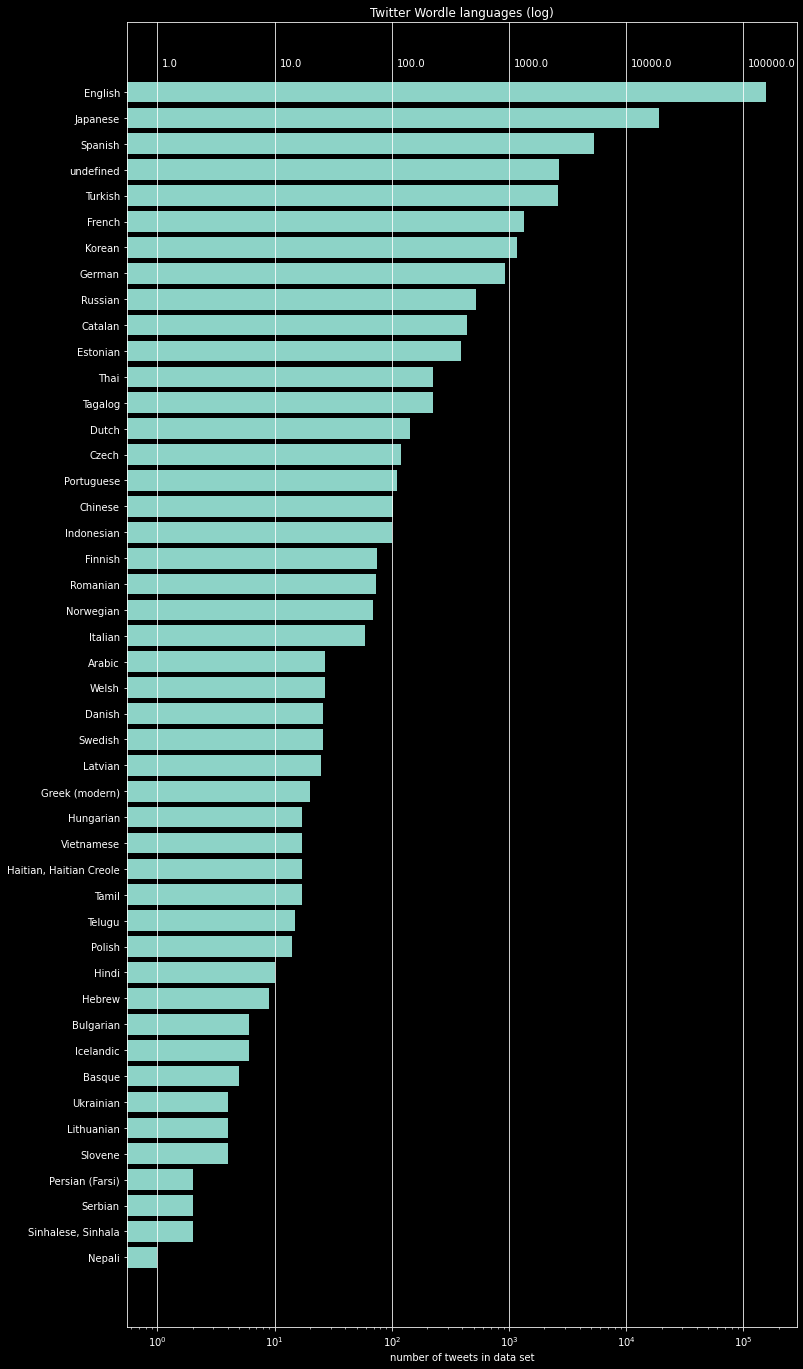

In [157]:
#plot languages
lang_vcs = tudf['lang'].value_counts()
lang_vcs_names = [
     lang_dict[lang]['name']
     for lang in lang_vcs.index
]
plt.figure(figsize=(12,24))
plt.grid(axis = 'x')
plt.barh(width=lang_vcs[::-1], y=lang_vcs_names[::-1], log = True)
plt.title('Twitter Wordle languages (log)')
plt.xlabel("number of tweets in data set")
for xpos in np.logspace(0,5,6):
    plt.text(x = xpos*1.1, y = 46, s= str(xpos))

### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [15]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

17635

In [16]:
is_reply.sum()/len(tudf)

0.09179397756552066

about 9% of these tweets are in reply to another tweet.

---
###  reply_settings


In [17]:
tudf['reply_settings'].value_counts()

everyone          191306
following            461
mentionedUsers       348
Name: reply_settings, dtype: int64

### entities_tweet

These were `entities` in the tweets data. Entities 

In [18]:
tudf['entities_tweet']

tweet_id
1521733018293084160    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521733015738662913    {'urls': [{'start': 58, 'end': 81, 'url': 'htt...
1521733011414257664                                                    0
1521733010504445954                                                    0
1521733001981444096    {'mentions': [{'start': 0, 'end': 12, 'usernam...
                                             ...                        
1520733413246144512    {'urls': [{'start': 118, 'end': 141, 'url': 'h...
1520733412725870592    {'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...
1520733410947485702                                                    0
1520733408607019008                                                    0
1520733408237916161                                                    0
Name: entities_tweet, Length: 192115, dtype: object

In [164]:
#what are the unique entities?
[
    json.loads(entity.replace("'", '"'))
    for entity in tudf['entities_tweet']
    if type(entity) == str
]

JSONDecodeError: Expecting ',' delimiter: line 1 column 263 (char 262)

In [165]:
json.loads(tudf.iloc[1]['entities_tweet'].replace("'", '"'))

{'urls': [{'start': 58,
   'end': 81,
   'url': 'https://t.co/ifnVQsE6bO',
   'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
   'display_url': 'wordle.danielfrg.com/ciencia/index.…',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}

In [21]:
ok ="{'urls':[{'start': 58, 'end': 81, 'url': 'https://t.co/ifnVQsE6bO', 'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html', 'display_url': 'wordle.danielfrg.com/ciencia/index.…', 'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig', 'width': 1200, 'height': 630}, {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150', 'width': 150, 'height': 150}], 'status': 200, 'title': 'Un juego de palabras diario', 'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.', 'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}"

In [22]:
json.loads(ok.replace("'", '"'))

{'urls': [{'start': 58,
   'end': 81,
   'url': 'https://t.co/ifnVQsE6bO',
   'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
   'display_url': 'wordle.danielfrg.com/ciencia/index.…',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}

In [227]:
# define a function to expand the JSON columns.
def expand_json(pandas_dataframe, column_to_expand, inplace = False):
    None
    
tudf.iloc[:2846]['entities_tweet'].apply(lambda x: json.loads(str(x).replace("'",'"')).keys() if type(x) == str else np.nan)

tweet_id
1521733018293084160        (urls)
1521733015738662913        (urls)
1521733011414257664           NaN
1521733010504445954           NaN
1521733001981444096    (mentions)
                          ...    
1521717475506860032    (mentions)
1521717472688283648           NaN
1521717472436572160        (urls)
1521717451335282688           NaN
1521717450496253952           NaN
Name: entities_tweet, Length: 2846, dtype: object

In [217]:
tudf.iloc[2840:2850]['entities_tweet']

tweet_id
1521717476677111808                                                    0
1521717475506860032    {'mentions': [{'start': 3, 'end': 15, 'usernam...
1521717472688283648                                                    0
1521717472436572160    {'urls': [{'start': 43, 'end': 66, 'url': 'htt...
1521717451335282688                                                    0
1521717450496253952                                                    0
1521717442875174913    {'urls': [{'start': 60, 'end': 83, 'url': 'htt...
1521717440329265152                                                    0
1521717432800448518    {'urls': [{'start': 45, 'end': 68, 'url': 'htt...
1521717420284649472    {'hashtags': [{'start': 164, 'end': 171, 'tag'...
Name: entities_tweet, dtype: object

# Tweet Rates, time.

In [23]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [24]:
tudf.sort_values(by = 'created_at', inplace= True)

In [25]:
tudf['wordle_tweet_number'] = range(len(tudf))

In [26]:
tudf['ones'] = np.ones(len(tudf))

In [27]:
time_diff = tudf['created_at'].max() -  tudf['created_at'].min()
time_diff.seconds

21757

In [28]:
tudf['wordle_tweet_rate'] = tudf['ones'][:-1]/list(map(lambda time: time.seconds,np.diff(tudf['created_at'])))

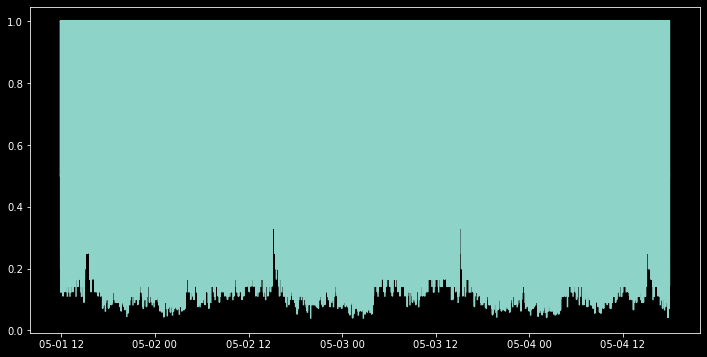

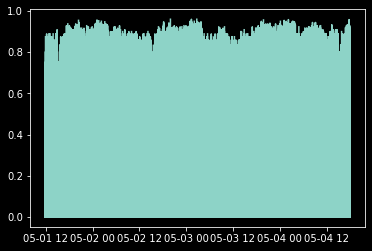

In [29]:
accumulated_tweets = np.linspace(0,len(tudf), len(tudf))
tweet_rate = [
    1/timespan.seconds
    for timespan in np.diff(tudf['created_at'].sort_values(ascending = True))
    if timespan.seconds != 0
]

# plt.figure(figsize = (12,6))
# plt.plot(tudf['created_at'].sort_values(ascending = True)[:-1], tweet_rate)
# # k= 2e7
# # plt.ylim(-k,k)
# plt.show()


plt.figure(figsize = (12,6))
plt.plot(tudf['created_at'], tudf['wordle_tweet_rate'])
plt.show()
plt.plot(tudf['created_at'], tudf['ones'] - tudf['wordle_tweet_rate'])

(0.0, 25.0)

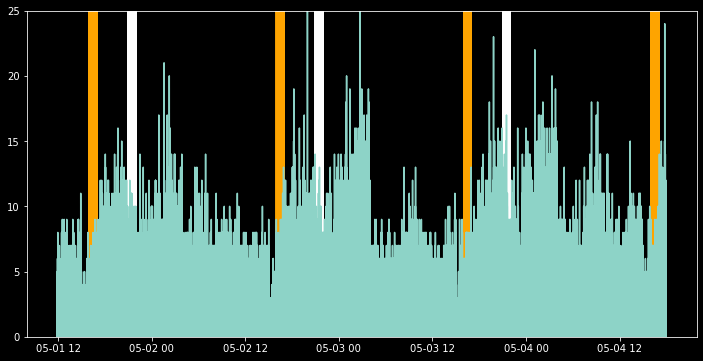

In [30]:
plt.figure(figsize = (12,6))
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'][:-1],np.diff(tudf['created_at'].apply(lambda x: x.second)) )
plt.ylim(0,25)

In [31]:
import datetime as dt

In [32]:
tudf['time_since_last_tweet'] = tudf['created_at'].diff().dt.total_seconds()

In [33]:
tudf['time_since_last_tweet']

tweet_id
1520733408237916161    NaN
1520733408607019008    0.0
1520733410947485702    0.0
1520733414999138310    1.0
1520733412725870592    0.0
                      ... 
1521911808176451586    1.0
1521911810563190785    1.0
1521911819077505026    2.0
1521911830817521664    2.0
1521911829244440577    0.0
Name: time_since_last_tweet, Length: 192115, dtype: float64

(0.0, 25.0)

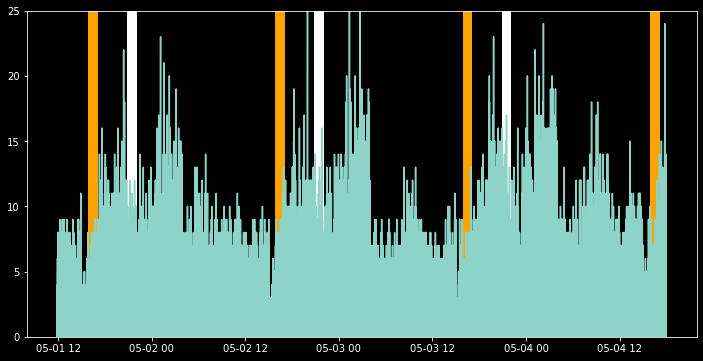

In [34]:
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet'] )
plt.ylim(0,25)

In [45]:
tudf['time_since_last_tweet_mean60'] = tudf['time_since_last_tweet'].rolling(60).mean() 

In [52]:
tudf['time_since_last_tweet_mean60'].mean()

1.4623534924891672

Text(0, 0.5, 'average wait time (s)')

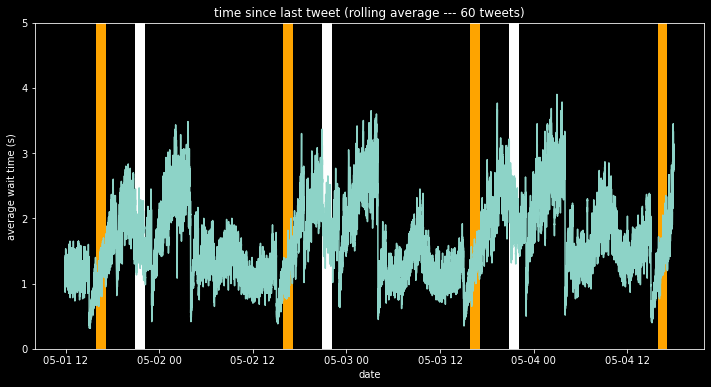

In [53]:
#do the same with rolling averages.
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

Text(0, 0.5, 'average wait time (s)')

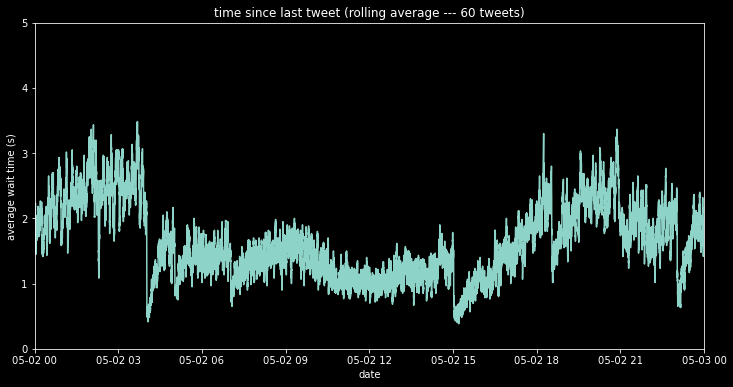

In [57]:
#plot rolling averages in one day.
plt.figure(figsize = (12,6))
plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

Text(2022-05-02 22:00:00+00:00, 2.0, '     France\n     Germany\n     Spain')

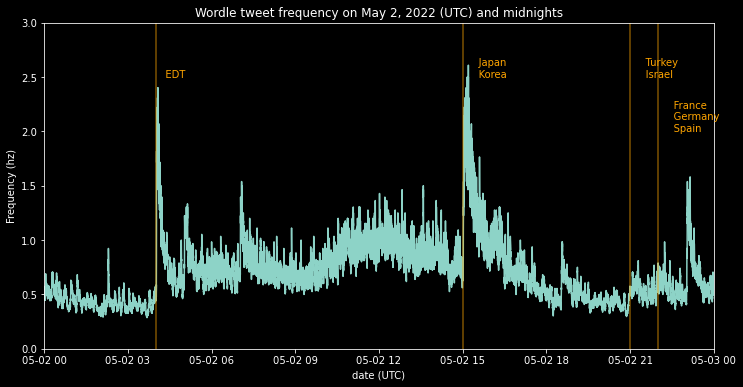

In [109]:
#plot the inverse. This is tweet frequency.

UTC = tz.gettz('UTC')

edt_offset = 4 # 4 am utc == midnight east coast usa. gmt -4
pdt_offset = 6 #6 am == midnight west coast usa. gmt -6
tokyo_offset = 15 # 3pm UTC == midnight japan, korea. gmt +9
turkey_offset = 21  # 9pm UTC == midnight turkey, israel. gmt +3
france_offset = 22 #10 pm UTC = midnight france, germany. gmt +2
canberra_offset = 14 # 2 pm UTC == midnight ACT eastern australia. GMT + 10

#more appropriately, should make tzinfo the corresponding type. but.
def midnight_datetime_may2(offset, tzinfo = UTC):
    midnight = datetime(2022, 5, 2, 0 + offset, 0, 0 ,tzinfo = tzinfo)
    return midnight

edt_midnight = midnight_datetime_may2(edt_offset)
tokyo_midnight =  midnight_datetime_may2(tokyo_offset)
turkey_midnight =  midnight_datetime_may2(turkey_offset)
france_midnight = midnight_datetime_may2(france_offset)


plt.figure(figsize = (12,6))
plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
plt.plot(tudf['created_at'], tudf['ones']/tudf['time_since_last_tweet_mean60'])
plt.ylim(0,3)
plt.title("Wordle tweet frequency on May 2, 2022 (UTC) and midnights")
plt.xlabel("date (UTC)")
plt.ylabel("Frequency (hz)")

plt.axvline(edt_midnight,  color = colors.to_rgba('orange',0.5))
plt.axvline(tokyo_midnight, color = colors.to_rgba('orange',0.5))
plt.axvline(turkey_midnight,  color = colors.to_rgba('orange',0.5))
plt.axvline(france_midnight,  color = colors.to_rgba('orange',0.5))

plt.text(edt_midnight, 2.5, "   EDT", color = 'orange')
plt.text(tokyo_midnight, 2.5, "     Japan\n     Korea", color = 'orange')
plt.text(turkey_midnight, 2.5, "     Turkey\n     Israel ", color = 'orange')
plt.text(france_midnight, 2., "     France\n     Germany\n     Spain", color = 'orange')

In [ ]:
#This is UTC, leading east coast USA by four hours. Some of these features definitely repeat.

# making the time series regular

The time data is irregular. Follow [this stack overflow](https://stackoverflow.com/questions/25234941/python-regularise-irregular-time-series-with-linear-interpolation) answer to use `traces` to make a regular time series.

> You can do this with traces. First, create a TimeSeries with your irregular measurements like you would a dictionary:
```python
    ts = traces.TimeSeries([
    (datetime(1992, 8, 27, 7, 46, 48), 28.0),
    (datetime(1992, 8, 27, 8, 0, 48), 28.2),
    ...
    (datetime(1992, 8, 27, 9, 3, 48), 30.0),
])
```

Then regularize using the sample method:

```python
    ts.sample(
    sampling_period=timedelta(minutes=15),
    start=datetime(1992, 8, 27, 8),
    end=datetime(1992, 8, 27, 9),
    interpolate='linear',
```
> This results in the following regularized version, where the gray dots are the original data and the orange is the regularized version with linear interpolation.

In [37]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install traces

[traces is pretty cool](https://traces.readthedocs.io/en/latest/#:~:text=The%20main%20object%20in%20traces,%3A45%3A56am%2C%20etc.&text=What%20if%20you%20want%20to,one%20of%20the%20measurement%20times.). It makes TimeSeries objects that interpolate between the data points by default. You can put any datetime in.

In [38]:
tudf['created_at']

tweet_id
1520733408237916161   2022-05-01 11:54:33+00:00
1520733408607019008   2022-05-01 11:54:33+00:00
1520733410947485702   2022-05-01 11:54:33+00:00
1520733414999138310   2022-05-01 11:54:34+00:00
1520733412725870592   2022-05-01 11:54:34+00:00
                                 ...           
1521911808176451586   2022-05-04 17:57:05+00:00
1521911810563190785   2022-05-04 17:57:06+00:00
1521911819077505026   2022-05-04 17:57:08+00:00
1521911830817521664   2022-05-04 17:57:10+00:00
1521911829244440577   2022-05-04 17:57:10+00:00
Name: created_at, Length: 192115, dtype: datetime64[ns, UTC]

In [39]:
import traces

from datetime import datetime

from dateutil import tz

In [40]:
#make a time series
ts = traces.TimeSeries(
        zip( tudf['created_at'],
            tudf['time_since_last_tweet_mean60']
        )
    )

tudf.iloc[0]['created_at']

Timestamp('2022-05-01 11:54:33+0000', tz='UTC')

In [41]:
#Give the time series tz awareness when making values.

UTC = tz.gettz('UTC')
ts[datetime(2042, 2, 1,  6,  0,  0, tzinfo = UTC)]

2.85

In [42]:
#make a histogram of the time series.
histogram = ts.distribution(
start=tudf['created_at'].min(),
end=tudf['created_at'].max()
)
histogram.median()

1.5333333333333334

In [43]:
histogram.standard_deviation(), histogram.mean(), histogram.max(), histogram.min()

(nan, nan, 3.9, nan)


## seasonal decomposing

I may not be able to do this without some conversion between the `traces` timeseries and however statsmodels works

In [44]:
ts[1]

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts)

plt.rc('figure', figsize(12,6))
decomp.plot();



In [ ]:
tudf['time_since_last_tweet']

In [ ]:
tudf['created_at'].apply(lambda x: x.second)

# geo and location

`geo` is a geocode corresponding to a location. They are also called `place_id`. The great majority of tweets do not have a geo code, but perhaps location could be gathered by the user, rather than the tweet itself.

According to [Get information about a place](https://developer.twitter.com/en/docs/twitter-api/v1/geo/place-information/api-reference/get-geo-id-place_id) in the Twitter docs,
> These IDs can be retrieved from geo/reverse_geocode.

`location` is a very general string.

In [ ]:

tudf.columns

In [ ]:
tudf['geo'].value_counts()

In [ ]:
len(tudf)

In [ ]:
#she/her is a location according to 239 of these

In [ ]:
tudf['location'].value_counts().head(30)

In [ ]:
tudf['entities_user'].iloc[2]

# User `entities`

I've called them `entities_user` in the merged df.

In [ ]:
json_list

In [ ]:
#the .replace("'", '"')
# must be done to replace single quotes with double quotes. otherwise it's not JSON.
json.loads(tudf['entities_user'].iloc[1].replace("'", '"'))

In [ ]:
json.loads()

In [ ]:
str.replace

### verified

In [234]:
tudf[tudf['verified'] == True]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521732483011678208,1521732483011678208,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟩🟨🟩\n⬜🟩🟩⬜🟩\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",21319630,...,https://t.co/ruI5hDjoCJ,Culture editor for https://t.co/BxsqjLzAG9. Ol...,https://pbs.twimg.com/profile_images/137802458...,"Salt Lake City, Utah",False,SeanPMeans,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
1521728105353678851,1521728105353678851,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟨⬜⬜\n⬜🟨⬜⬜🟩\n⬜🟨🟩🟩🟩\n🟩🟩🟩🟩🟩🏋️‍♀️,"[{'domain': {'id': '30', 'name': 'Entities [En...",20658431,...,https://t.co/u0IQ155nFc,Televisionary,https://pbs.twimg.com/profile_images/152146574...,Australia,False,Jabbatron,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.133909e+18,0
1521727958372737025,1510855326161117185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@IreneSGuadalupo @NisMorFer Wordle 319 4/6\n⬜🟨...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18690355,...,https://t.co/Zz9rgVMkU0,Desearía que más personas se preocuparan del m...,https://pbs.twimg.com/profile_images/143172254...,Segovia,False,Milhaud,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",9.941547e+17,0
1521726666585874434,1521726666585874434,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\n\n⬜⬜⬜⬜🟩\n⬜⬜🟨⬜🟩\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",189823957,...,0,Me encanta viajar por carreteras secundarias. ...,https://pbs.twimg.com/profile_images/146798198...,Murcia,False,garciaretegui,True,0,0.000000e+00,0
1521724243062366213,1521724243062366213,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟩⬛⬛⬛⬛\n🟨⬛⬛⬛⬛\n⬛🟩🟨🟨⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",19869814,...,https://t.co/9T1aAAFXt8,Sports journalist @the_hindu . FIA accredited ...,https://pbs.twimg.com/profile_images/142319722...,Chennai,False,dipakragav,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520735198828109824,1520735198828109824,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 14, 'like_...",Wordle 316 5/6\r\n\r\n⬜🟨⬜⬜⬜\r\n⬜⬜⬜⬜⬜\r\n⬜⬜🟩⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",23103351,...,https://t.co/xjEa5MGsYT,@EbonyMag #Power100 @Essence #Woke100. Prof. P...,https://pbs.twimg.com/profile_images/126838338...,Global,False,karenhunter,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.147608e+18,0
1520734510379323392,1520734510379323392,everyone,tr,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",Wordle Türkçe 316 4/6\r\n\r\n⬜⬜⬜⬜⬜\r\n🟩⬜⬜⬜⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",341071545,...,https://t.co/OByiy1t7Rj,"@kafadergisi yazarı, Oyuncu. iletişim: @gavsar...",https://pbs.twimg.com/profile_images/138310839...,İstanbul,False,celilnalcakan,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.512321e+18,0
1520733907217432578,1492893611825971204,everyone,en,0,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",Too many close calls here...\r\n\r\nWordle 316...,"[{'domain': {'id': '30', 'name': 'Entities [En...",32284383,...,https://t.co/04uDTeI5Ld,"Meteorologist with @CityNewsTO, @WGR